# <center> Project 02: Application of classification in Marketing and Sales </center>

**Àlex Montoya Pérez (242873)**

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to June 17th, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [162]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,28,161.0,154.0,10.0,2505.609457
1,Steinfurt,0,NaN,74.0,4.0,52,41.0,41.0,1.0,2714.197904
2,Magdeburg,0,NaN,83.0,28.0,29,188.0,187.0,6.0,2245.828787
3,Leipzig,0,NaN,61.0,28.0,13,597.0,594.0,21.0,2163.784785
4,Tamm,0,NaN,74.0,4.0,40,336.0,334.0,10.0,2338.611264


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [163]:
# Mostramos información sobre el market_dt. (número de columnas, etiquetas de columna, tipos de datos de columna, uso de memoria, índice de rango y el número de celdas en cada columna (valores no nulos).
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [164]:
market_dt = market_dt.dropna() # con el método .dropna() eliminamos la filas que contienen valores Nulos
market_dt.info() # Mostramos la info una vez eliminados los valores NULL
print('\nEl tamaño del dataset resultante es: ', market_dt.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB

El tamaño del dataset resultante es:  (6987, 10)


Your output should look like this:

In [165]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

In [166]:
# Customer_Flag = 1 --> customers | Customer_Flag = 0 --> non-customers
customer_dt = market_dt[market_dt['Customer_Flag']==1]
noncustomer_dt = market_dt[market_dt['Customer_Flag']==0]

# Definiremos una función para crear cada uno de los casos que se nos pide:

# Función para hacer el boxplot del customer dataset
def c_boxplot(var_name):
    fig1, ax1 = pyplot.subplots()
    ax1.set_title("Customer " + var_name)
    ax1.boxplot(customer_dt[var_name])
    ax1.set_yscale('log')
    pyplot.show()
    
# Función para hacer el boxplot del non-customer dataset   
def nc_boxplot(var_name): 
    fig1, ax1 = pyplot.subplots()
    ax1.set_title("Non-Customer " + var_name)
    ax1.boxplot(noncustomer_dt[var_name])
    ax1.set_yscale('log')
    pyplot.show()

# **CUSTOMER BOXPLOTS**

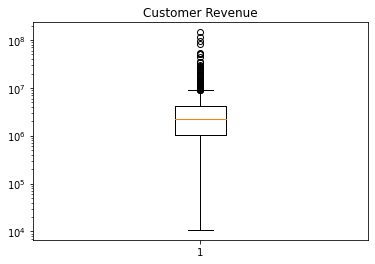

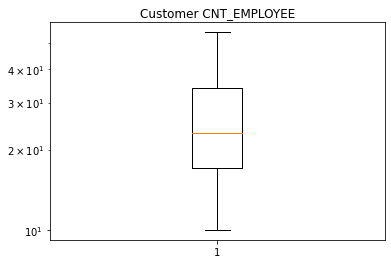

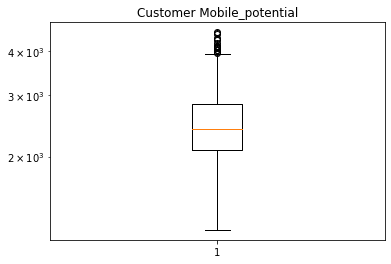

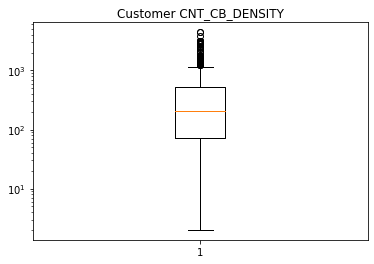

In [167]:
#Utilizamos la función c_boxplot creada previamente para crear los boxplots de customer con cada una de las variables
c_boxplot("Revenue")
c_boxplot("CNT_EMPLOYEE")
c_boxplot("Mobile_potential")
c_boxplot("CNT_CB_DENSITY")

# **NON-CUSTOMER BOXPLOTS**

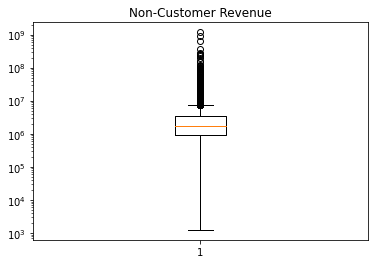

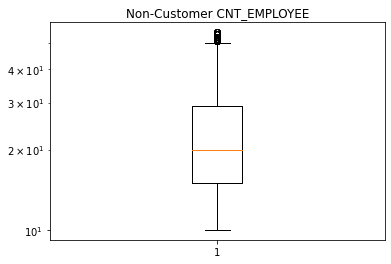

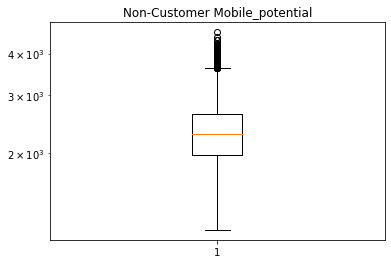

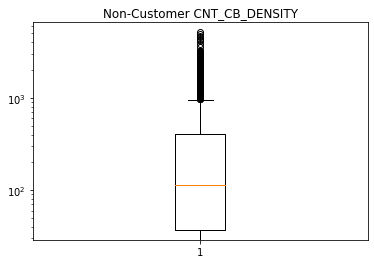

In [168]:
#Utilizamos la función nc_boxplot creada previamente para crear los boxplots de non-customer con cada una de las variables
nc_boxplot("Revenue")
nc_boxplot("CNT_EMPLOYEE")
nc_boxplot("Mobile_potential")
nc_boxplot("CNT_CB_DENSITY")

In [169]:
#### REVENUE ### 

# Calculos de los cuartiles para customer (Revenue) ------------------------------|

Q1_c = customer_dt['Revenue'].quantile(0.25)
Q2_c = customer_dt['Revenue'].quantile(0.5)
Q3_c = customer_dt['Revenue'].quantile(0.75)

print('Customer Revenue (Q1): ', Q1_c)
print('Customer Revenue (Q2): ', Q2_c)
print('Customer Revenue (Q3): ', Q3_c)

# Calculos de los cuartiles para non-customer (Revenue) --------------------------|

Q1_nc = noncustomer_dt['Revenue'].quantile(0.25)
Q2_nc = noncustomer_dt['Revenue'].quantile(0.5)
Q3_nc = noncustomer_dt['Revenue'].quantile(0.75)

print('Non-Customer Revenue (Q1): ', Q1_nc)
print('Non-Customer Revenue (Q2): ', Q2_nc)
print('Non-Customer Revenue (Q3): ', Q3_nc)

# Calculos de los outliers para (Revenue) --------------------------|
IQR_customer = Q3_c - Q1_c
IQR_noncustomer = Q3_nc - Q1_nc;

outliers_max = (customer_dt['Revenue'] > Q3_c + 1.5*IQR_customer)
outliers_min = (customer_dt['Revenue'] < Q1_c - 1.5*IQR_customer)
print('Customer Outliers (Revenue): ',np.sum(outliers_max)+np.sum(outliers_min))
outliers_max = (noncustomer_dt['Revenue'] > Q3_nc + 1.5*IQR_noncustomer)
outliers_min = (noncustomer_dt['Revenue'] < Q1_nc - 1.5*IQR_noncustomer)
print('Non-customer Outliers (Revenue):',np.sum(outliers_max)+np.sum(outliers_min))



Customer Revenue (Q1):  1047500.0
Customer Revenue (Q2):  2200000.0
Customer Revenue (Q3):  4195000.0
Non-Customer Revenue (Q1):  902986.0
Non-Customer Revenue (Q2):  1750000.0
Non-Customer Revenue (Q3):  3501123.5
Customer Outliers (Revenue):  95
Non-customer Outliers (Revenue): 569


In [170]:
#### MOBILE_POTENTIAL ### 

# Calculos de los cuartiles para customer (Mobile_potential) ---------------------|

Q1_c = customer_dt['Mobile_potential'].quantile(0.25)
Q2_c = customer_dt['Mobile_potential'].quantile(0.5)
Q3_c = customer_dt['Mobile_potential'].quantile(0.75)

print('Customer Mobile_potential (Q1): ', Q1_c)
print('Customer Mobile_potential (Q2): ', Q2_c)
print('Customer Mobile_potential (Q3): ', Q3_c)

# Calculos de los cuartiles para non-customer (Mobile_potential) -----------------|

Q1_nc = noncustomer_dt['Mobile_potential'].quantile(0.25)
Q2_nc = noncustomer_dt['Mobile_potential'].quantile(0.5)
Q3_nc = noncustomer_dt['Mobile_potential'].quantile(0.75)

print('Non-Customer Mobile_potential (Q1): ', Q1_nc)
print('Non-Customer Mobile_potential (Q2): ', Q2_nc)
print('Non-Customer Mobile_potential (Q3): ', Q3_nc)

Customer Mobile_potential (Q1):  2090.6967281537
Customer Mobile_potential (Q2):  2401.464692530968
Customer Mobile_potential (Q3):  2826.2351826061667
Non-Customer Mobile_potential (Q1):  1975.5165190653966
Non-Customer Mobile_potential (Q2):  2277.9727974861535
Non-Customer Mobile_potential (Q3):  2631.926166103982


In [171]:
### CNT_EMPLOYEE ###

print('Customer [CNT_EMPLOYEE]: ', customer_dt['CNT_EMPLOYEE'].max())
print('Non-customer [CNT_EMPLOYEE]: ', noncustomer_dt['CNT_EMPLOYEE'].max())

Customer [CNT_EMPLOYEE]:  55
Non-customer [CNT_EMPLOYEE]:  55


[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

In [172]:
# Eliminamos los valores mas grandes que 5*IQR para las siguientes variables ('Revenue', 'CNT_EMPLOYEE', 'Mobile_potential', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY' )
var_names = ['Revenue', 'CNT_EMPLOYEE', 'Mobile_potential', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY']
IQR_customer = np.array([5*iqr(customer_dt[i]) for i in var_names])
IQR_noncustomer = np.array([5*iqr(noncustomer_dt[i]) for i in var_names])

for i in range(0,len(var_names)):
    customer_dt = customer_dt.drop(customer_dt[customer_dt[var_names[i]] > IQR_customer[i]].index)
    noncustomer_dt = noncustomer_dt.drop(noncustomer_dt[noncustomer_dt[var_names[i]] > IQR_noncustomer[i]].index)
    
# Una vez eliminados , volvemos a hacer los boxplots de cada variable para comparar con los resultados obtenidos en el ejercicio anterior
customer_dt.info()
noncustomer_dt.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                956 non-null    object 
 1   Customer_Flag       956 non-null    int64  
 2   Revenue             956 non-null    float64
 3   Sector              956 non-null    float64
 4   Legal_Form_Code     956 non-null    float64
 5   CNT_EMPLOYEE        956 non-null    int64  
 6   CNT_CB_DENSITY      956 non-null    float64
 7   CNT_CB_MOB_DENSITY  956 non-null    float64
 8   CNT_CB_FN_DENSITY   956 non-null    float64
 9   Mobile_potential    956 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 82.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 5 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                4909 no

# **CUSTOMER BOXPLOTS**

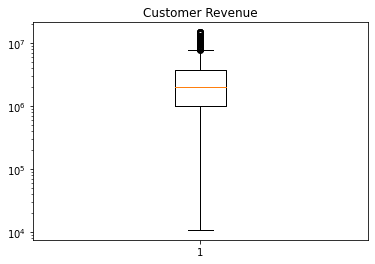

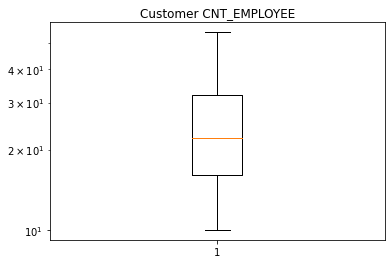

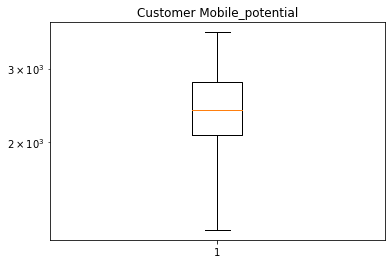

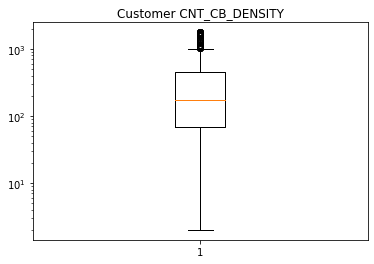

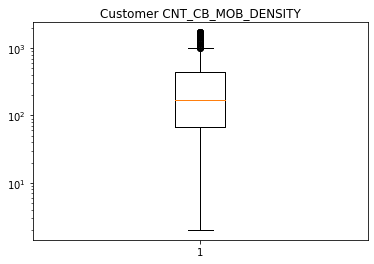

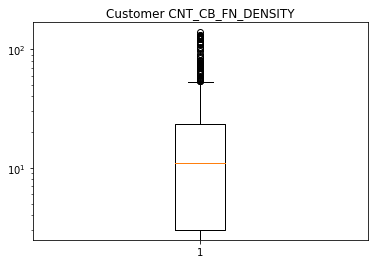

In [173]:
#Utilizamos la función c_boxplot creada previamente para crear los boxplots de customer con cada una de las variables
c_boxplot("Revenue")
c_boxplot("CNT_EMPLOYEE")
c_boxplot("Mobile_potential")
c_boxplot("CNT_CB_DENSITY")
c_boxplot("CNT_CB_MOB_DENSITY")
c_boxplot("CNT_CB_FN_DENSITY")

# **NON-CUSTOMER BOXPLOTS**

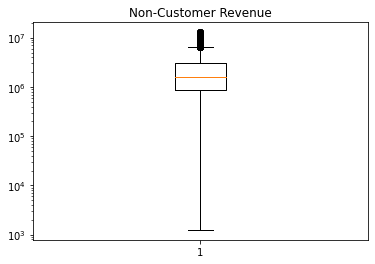

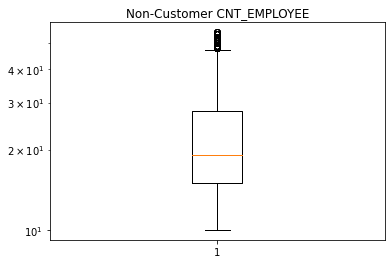

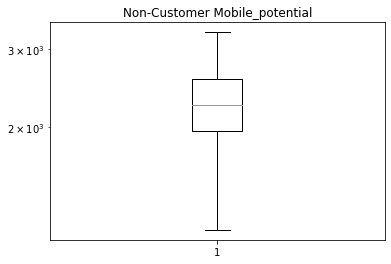

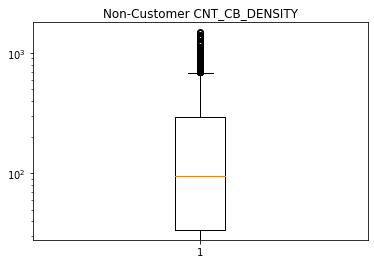

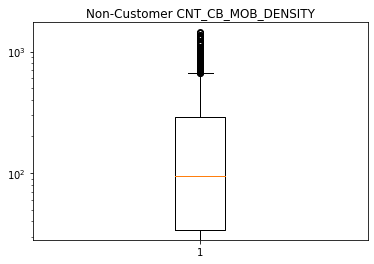

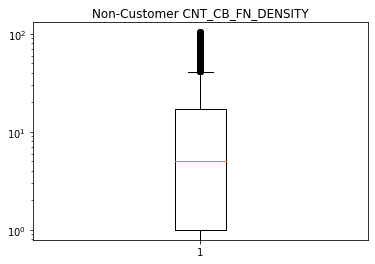

In [174]:
#Utilizamos la función nc_boxplot creada previamente para crear los boxplots de non-customer con cada una de las variables
nc_boxplot("Revenue")
nc_boxplot("CNT_EMPLOYEE")
nc_boxplot("Mobile_potential")
nc_boxplot("CNT_CB_DENSITY")
nc_boxplot("CNT_CB_MOB_DENSITY")
nc_boxplot("CNT_CB_FN_DENSITY")

# **DIFERÉNCIAS RESPECTO AL EJERCICIO 3**

Podemos ver que el número de outliers disminuye considerablemente respecto al ejercicio anterior, debido a que hemos eliminado todos los valores mayores a 5*IQR en ambos datasets , aunque seguiremos teniendo outliers. 

Tambien podemos ver que como al eliminar los valores mas grandes a 5*IQR de cada una de las variables alguna ha sufrido alguna pequeña modificación , aunque cabe recalcar que la modificación es pequeña debido a que la media no es muy sensible con los outliers 


On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

# **RATIO CUSTOMER**

In [175]:
# RATIO CUSTOMER -----------------|
customer_dt['City'].value_counts(normalize=True)

München         0.024059
Köln            0.020921
Chemnitz        0.017782
Dresden         0.015690
Berlin          0.015690
                  ...   
Hiddenhausen    0.001046
Eppelheim       0.001046
Flörsheim       0.001046
Bad Abbach      0.001046
Wedemark        0.001046
Name: City, Length: 557, dtype: float64

# **RATIO NON-CUSTOMER**

In [176]:
# RATIO NON CUSTOMER -----------------|
noncustomer_dt['City'].value_counts(normalize=True)

Köln          0.016093
Bremen        0.009982
Stuttgart     0.009778
Dortmund      0.009371
Dresden       0.009167
                ...   
Salzbergen    0.000204
Bonstetten    0.000204
Neusäß        0.000204
Wolfhagen     0.000204
Solms         0.000204
Name: City, Length: 2126, dtype: float64

As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [177]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [178]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

In [179]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,785
11551,Greding,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,723
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,443
11554,Frankfurt,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,592
11565,Benningen,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,205


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [180]:
# Juntamos ambos datasets en un dataset final
final_dataset = customer_dt.append(noncustomer_dt)
final_dataset['Target'] = customer_dt['Customer_Flag'].append(noncustomer_dt['Customer_Flag'])

var_names = ['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Target']
final_dataset = final_dataset[var_names]

# Mostramos el nuevo dataset final:


The output should look like this:

In [181]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
11548,785,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,1
11551,723,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,1
11553,443,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,1
11554,592,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,1
11565,205,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,1


In [182]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
11542,734,6391606.0,60.0,20.0,24,57.0,57.0,0.0,2102.700888,0
11543,1867,305000.0,60.0,4.0,13,9.0,9.0,0.0,1548.889725,0
11544,596,4200000.0,23.0,14.0,54,62.0,62.0,6.0,2388.407248,0
11545,1913,1336495.0,60.0,16.0,20,63.0,61.0,2.0,2657.602909,0
11546,982,4593054.0,64.0,14.0,44,90.0,90.0,5.0,2126.540797,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [183]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.20, random_state=42)  # Modificamos el test_size a 0,20

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [184]:
# Con la funcion len podemos obtener las longitudes de cada uno de los datasets
print("Longitud de X_train: ", len(X_train))
print("Longitud de X_test: ", len(X_test))

# Printamos tambien la longitud del 20% y el 80% del dataset final para poder verificar que corresponde con la longitud del x_test y x_train respectivamente
print("Longitud de final_dataset (20%): ", len(final_dataset)*0.2)
print("Longitud de final_dataset (80%): ", len(final_dataset)*0.8)


Longitud de X_train:  4692
Longitud de X_test:  1173
Longitud de final_dataset (20%):  1173.0
Longitud de final_dataset (80%):  4692.0


In [185]:
X_train

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
7960,1046,600000.0,76.0,4.0,11,151.0,147.0,12.0,1972.354419
3666,828,650000.0,43.0,31.0,13,26.0,26.0,0.0,1621.528745
11891,1126,10293108.0,62.0,14.0,45,1062.0,1046.0,49.0,2389.105026
2687,15,800000.0,47.0,14.0,15,216.0,183.0,63.0,1999.283002
10970,106,2150000.0,23.0,14.0,20,9.0,9.0,0.0,2276.088037
...,...,...,...,...,...,...,...,...,...
5330,596,1000000.0,63.0,14.0,14,62.0,62.0,6.0,1505.291561
8496,1347,65000.0,31.0,4.0,22,415.0,412.0,22.0,2445.165717
8940,1283,1500000.0,44.0,31.0,19,571.0,560.0,37.0,2556.494244
10511,431,11789764.0,42.0,14.0,15,493.0,481.0,29.0,2543.417778


[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

# **HISTOGRAMA y_train** 

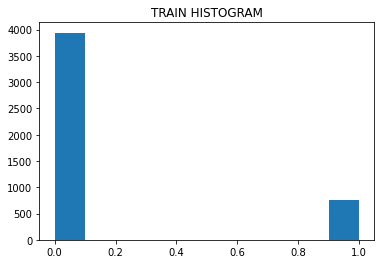

In [186]:
plt.hist(y_train)
plt.title('TRAIN HISTOGRAM')
plt.show()

# **HISTOGRAMA y_test** 

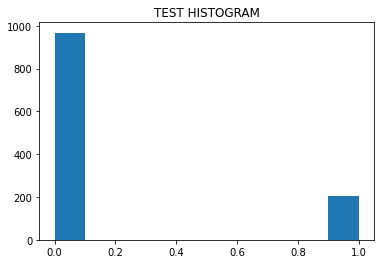

In [187]:
plt.hist(y_test)
plt.title('TEST HISTOGRAM')
plt.show()

# **HISTOGRAMA y_train (azul) vs HISTOGRAMA y_Test (naranja)** 

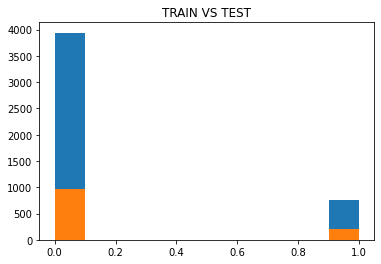

In [188]:
plt.hist(y_train)
plt.hist(y_test)
plt.title('TRAIN VS TEST')
plt.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

# **TRAINING**

In [189]:
#### --- Support Vector Classification ==> SVC()
model_SVC = SVC() #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(X_test) #Test the trained model with test samples
result_SVC=model_SVC.score(X_test, y_test) #Print the score of the trained model
print("SVC Accuracy:", result_SVC, "\n")
print(classification_report(y_test,y_pred_SVC), "\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")


SVC Accuracy: 0.8277919863597613 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       968
           1       1.00      0.01      0.03       205

    accuracy                           0.83      1173
   macro avg       0.91      0.51      0.47      1173
weighted avg       0.86      0.83      0.75      1173
 

 Confusion Matrix: 
[[968   0]
 [202   3]] 



# **TEST**

In [190]:
#### --- Support Vector Classification ==> SVC()
model_SVC = SVC() #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_test, y_test) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(X_train) #Test the trained model with test samples
result_SVC=model_SVC.score(X_train, y_train) #Print the score of the trained model
print("SVC Accuracy:", result_SVC, "\n")
print(classification_report(y_train,y_pred_SVC), "\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_SVC)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")


SVC Accuracy: 0.8412190963341859 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3941
           1       1.00      0.01      0.02       751

    accuracy                           0.84      4692
   macro avg       0.92      0.50      0.46      4692
weighted avg       0.87      0.84      0.77      4692
 

 Confusion Matrix: 
[[3941    0]
 [ 745    6]] 



Podemos ver como entrenar nuestro modelo con los datos del train obtenemos mejores resultados que con el dataset de test,donde tenemos una mayor cantidad de falsos positivos. Esto es debido a que el dataset de train tiene una mayor cantidad de datos, concretamente un 80%, lo que implica que nuestro modelo pueda entrenar mejor, por ende tener un mejor redimiento para enfrentar las unseendatasets

### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

# **TRAINING**

In [191]:
#### --- Decision Tree Classifier ==> DecisionTreeClassifier()
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)
result_DT=model_DT.score(X_test, y_test)
print("DT Accuracy:", result_DT, "\n")
print(classification_report(y_test, y_pred_DT))

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

DT Accuracy: 0.7638533674339301 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       968
           1       0.33      0.35      0.34       205

    accuracy                           0.76      1173
   macro avg       0.60      0.60      0.60      1173
weighted avg       0.77      0.76      0.77      1173

 Confusion Matrix: 
[[824 144]
 [133  72]] 



# **TEST**


In [192]:
#### --- Decision Tree Classifier ==> DecisionTreeClassifier()
model_DT = DecisionTreeClassifier()
model_DT.fit(X_test, y_test)
y_pred_DT=model_DT.predict(X_train)
result_DT=model_DT.score(X_train, y_train)
print("DT Accuracy:", result_DT, "\n")
print(classification_report(y_train, y_pred_DT))

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_DT)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

DT Accuracy: 0.7453111679454391 

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3941
           1       0.24      0.27      0.25       751

    accuracy                           0.75      4692
   macro avg       0.55      0.55      0.55      4692
weighted avg       0.76      0.75      0.75      4692

 Confusion Matrix: 
[[3296  645]
 [ 550  201]] 



# **Comparación de resultados SVM vs Decision Tree**

Comparando los resultados del Decision Tree con los de SVM , podemos ver lo siguiente:

*  Si miramos las Confusion Matrix obtenidas podemos ver que en el caso del DT obtenemos una menor cantidad de falsos positivos y falsos negativos respecto al SVM
* Podemos ver como el accuracy obtenido con el DT es un poco superior al que obtenemos con el SVM

**Conclusion:** Podriamos concluir que en este caso el Decision Tree seria un mejor modelo que el SVM debido a que este no discrimina tantos datos como en el caso de SVM.



### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

In [193]:
#Models definition
models=[]
models.append(('SVM', SVC()))
models.append(('Decision_trees', DecisionTreeClassifier()))
#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=5, random_state=10,shuffle = True) # n_splits = 5,  shuffle = True
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.8412226862038507 and accuracy (std): 0.012236269697255806
Model Decision_trees with accuracy (mean): 0.7604496912970519 and accuracy (std): 0.018817166447284026


The output of the boxplots should look like this:

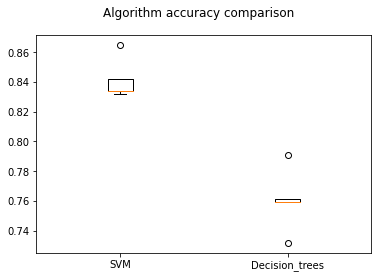

In [194]:
#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**CONCLUSIÓN**

Podemos observar como el modelo con mejor media para la accuracy es el SVM , lo que significa que será mas exacto a la hora de clasificar los datos.
En cuanto a la accuracy de la std , podemos ver como obtenemos unos valores muy similares, siendo minimamente mas pequeño el del SVM

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


In [195]:
customer_dt = final_dataset[(final_dataset['Target']==1)]
print("The number of samples in noncustomer dataset is:", len(noncustomer_dt))

noncustomer_dt = final_dataset[(final_dataset['Target']==0)]
print("The number of samples in customer dataset is:", len(customer_dt))


The number of samples in noncustomer dataset is: 4909
The number of samples in customer dataset is: 956


Let's undersample the `noncustomer_dt` to balance both datasets:

In [196]:
noncustomer_dt_sample=noncustomer_dt.sample(956) #cambiamos 840 por 956 para balancear correctamente
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 956


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

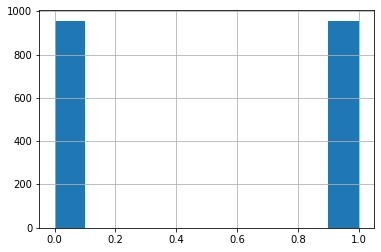

In [197]:
final_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset=final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()

**Conclusión**

Para este apartado hemos disminuido la cantidad de datos de non-customer para balancearlo con la cantidad de datos que tenemos de customer (956)
Con esto conseguiremos que los datos esten balanceados, peró a la vez estaremos perdiendo una gran cantidad de información respecto a los non-customers

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [198]:
X_train, X_test, y_train, y_test = train_test_split(final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.2, random_state=42)

# **Training SVC**

In [199]:
# -- SVC ---------------------------------------------------------------------------------------------|
model_SVC = SVC() #Create the model based SVC and kernel by defaul is "rbf"
model_SVC.fit(X_train, y_train) #Train the model with the training samples: X_train and y_train
y_pred_SVC=model_SVC.predict(X_test) #Test the trained model with test samples
result_SVC=model_SVC.score(X_test, y_test) #Print the score of the trained model

print("SVC Accuracy:", result_SVC)
print(classification_report(y_test,y_pred_SVC), "\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

SVC Accuracy: 0.5848563968668408
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       187
           1       0.59      0.64      0.61       196

    accuracy                           0.58       383
   macro avg       0.58      0.58      0.58       383
weighted avg       0.58      0.58      0.58       383
 

 Confusion Matrix: 
[[ 98  89]
 [ 70 126]] 



# **Training Decision Tree**

In [200]:
# -- DT ----------------------------------------------------------------------------------------------|
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT=model_DT.predict(X_test)
result_DT=model_DT.score(X_test, y_test)

print("DT Accuracy:", result_DT, "\n")
print(classification_report(y_test, y_pred_DT))

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

DT Accuracy: 0.5404699738903395 

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       187
           1       0.55      0.54      0.54       196

    accuracy                           0.54       383
   macro avg       0.54      0.54      0.54       383
weighted avg       0.54      0.54      0.54       383

 Confusion Matrix: 
[[102  85]
 [ 91 105]] 



### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [201]:
model_VC = VotingClassifier(estimators=[('SVM', SVC()), ('DT', DecisionTreeClassifier())])  # default=’hard’
model_VC.fit(X_train, y_train)
y_pred_VC = model_VC.predict(X_test)

print(classification_report(y_test,y_pred_VC))

print("Accuracy: ", accuracy_score(y_test, y_pred_VC, ),"\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_VC)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")


              precision    recall  f1-score   support

           0       0.54      0.78      0.64       187
           1       0.64      0.37      0.47       196

    accuracy                           0.57       383
   macro avg       0.59      0.57      0.55       383
weighted avg       0.59      0.57      0.55       383

Accuracy:  0.5691906005221932 

 Confusion Matrix: 
[[146  41]
 [124  72]] 



### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [202]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

print(classification_report(y_test,y_pred_RF))

print("Accuracy: ", accuracy_score(y_test, y_pred_RF, ),"\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       187
           1       0.61      0.61      0.61       196

    accuracy                           0.60       383
   macro avg       0.60      0.60      0.60       383
weighted avg       0.60      0.60      0.60       383

Accuracy:  0.6031331592689295 

 Confusion Matrix: 
[[111  76]
 [ 76 120]] 



[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

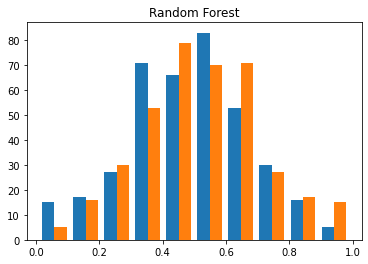

In [203]:
y_pred = model_RF.predict_proba(X_test)

plt.figure()
plt.hist(y_pred)
plt.title('Random Forest')
plt.show()


### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [204]:
model_GB = GradientBoostingClassifier(random_state=0)
model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)

print(classification_report(y_test,y_pred_GB))

print("Accuracy: ", accuracy_score(y_test, y_pred_GB, ),"\n")

# Calculamos la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_GB)
print(" Confusion Matrix: ")
print(conf_matrix, "\n")

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       187
           1       0.62      0.67      0.64       196

    accuracy                           0.62       383
   macro avg       0.62      0.61      0.61       383
weighted avg       0.62      0.62      0.62       383

Accuracy:  0.6161879895561357 

 Confusion Matrix: 
[[105  82]
 [ 65 131]] 



[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

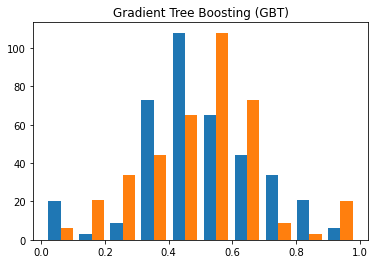

In [205]:
y_pred = model_GB.predict_proba(X_test)

plt.figure()
plt.hist(y_pred)
plt.title('Gradient Tree Boosting (GBT)')
plt.show()

# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




Buscaremos cual es el mejor valor del cutoff en el modelo GBT que nos permitirá distinguir mejor la clase 1 que la 0

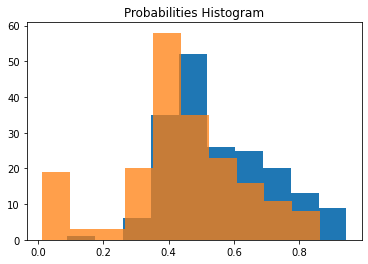

With cutoff:  0.4
              precision    recall  f1-score   support

           0       0.27      0.14      0.19       187
           1       0.43      0.62      0.51       196

    accuracy                           0.39       383
   macro avg       0.35      0.38      0.35       383
weighted avg       0.35      0.39      0.35       383

[[ 27 160]
 [ 74 122]] 

Accuracy:  0.38903394255874674
With cutoff:  0.5
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       187
           1       0.38      0.33      0.36       196

    accuracy                           0.38       383
   macro avg       0.38      0.39      0.38       383
weighted avg       0.38      0.38      0.38       383

[[ 82 105]
 [131  65]] 

Accuracy:  0.3838120104438642
With cutoff:  0.6
              precision    recall  f1-score   support

           0       0.42      0.63      0.51       187
           1       0.34      0.18      0.24       196

    accuracy     

In [206]:
y_pred = model_GB.predict_proba(X_test)
z = y_pred[:,0]
c_hist, nc_hist = [], []

#histograma
for i in range(len(z)):
    if y_test.values[i] == 0:
        nc_hist.append(z[i])
    else:
        c_hist.append(z[i])
        
plt.hist(nc_hist)
plt.hist(c_hist, alpha=0.75)
plt.title("Probabilities Histogram")
plt.show()

cutoff = [0.4, 0.5, 0.6, 0.8, 0.9]  # valores de cutoff que probaremos
# predicciones con los diferentes valores de cutoff
for c in cutoff:
    y_pred_modification = []
    for i in y_pred:
        if i[0] > c:
            y_pred_modification.append(1)
        else:
            y_pred_modification.append(0)

    print("With cutoff: ", c)
    print(classification_report(y_test,y_pred_modification))
    conf_matrix = confusion_matrix(y_test, y_pred_modification)
    print(conf_matrix, "\n")
    print("Accuracy: ", accuracy_score(y_test, y_pred_modification))


Observando los diferentes valores que hemos obtenidos, como nos interesa predecir mejor los non customers, para asi saber que los falsos positvos serán mas fiables, eligiremos un valor de cutoff de0,5, que es donde obtenenmos unos valores de precision y recall mas equilibrados

In [207]:
num_noncustomers=0
cutoff = [0.50]# valores de cutoff que probaremos
# predicciones con los diferentes valores de cutoff
for c in cutoff:
    y_pred_modification = []
    for i in y_pred:
        if i[0] > c:
            y_pred_modification.append(1)
        else:
            y_pred_modification.append(0)
            num_noncustomers +=1

    print("With cutoff: ", c)
    print(classification_report(y_test,y_pred_modification))
    conf_matrix = confusion_matrix(y_test, y_pred_modification)
    print(conf_matrix, "\n")
    print("Accuracy: ", accuracy_score(y_test, y_pred_modification))

print("Número de noncustomers que enviaremos al manager (cutoff = 0,50) --> ", num_noncustomers)

With cutoff:  0.5
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       187
           1       0.38      0.33      0.36       196

    accuracy                           0.38       383
   macro avg       0.38      0.39      0.38       383
weighted avg       0.38      0.38      0.38       383

[[ 82 105]
 [131  65]] 

Accuracy:  0.3838120104438642
Número de noncustomers que enviaremos al manager (cutoff = 0,50) -->  213


Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [208]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=model_GB.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])
    
features_importance

[['City_coded', 0.11309809621263303],
 ['Revenue', 0.14826458873665388],
 ['Sector', 0.0701568970011967],
 ['Legal_Form_Code', 0.09707876997674152],
 ['CNT_EMPLOYEE', 0.04430026965963696],
 ['CNT_CB_DENSITY', 0.1406339422428104],
 ['CNT_CB_MOB_DENSITY', 0.06929252383539468],
 ['CNT_CB_FN_DENS', 0.09419333384720513],
 ['Mobile_potential', 0.22298157848772762]]

[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [209]:
features_importance = sorted(features_importance, key=lambda features_importance: features_importance[1], reverse = True)
features_importance

[['Mobile_potential', 0.22298157848772762],
 ['Revenue', 0.14826458873665388],
 ['CNT_CB_DENSITY', 0.1406339422428104],
 ['City_coded', 0.11309809621263303],
 ['Legal_Form_Code', 0.09707876997674152],
 ['CNT_CB_FN_DENS', 0.09419333384720513],
 ['Sector', 0.0701568970011967],
 ['CNT_CB_MOB_DENSITY', 0.06929252383539468],
 ['CNT_EMPLOYEE', 0.04430026965963696]]

  [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of a **New IoT tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today this New IoT tariff is very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`Number of IoT devices (units)` vs `Number of IoT applications (units)`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `Number of IoT devices (units)` and `Number of IoT applications (units)` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- Is the training dataset balanced? Justiy your answer
- According to the previous plane, which are the customers to be phoned to sell the New IoT tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**